# 벡터 자기 회귀 모형
## 개요
VAR 모델은 다변량 시계열 데이터를 분석할 때 사용되며, 여러 변수들이 서로 영향 (y <-> x)을 미칠 때 효과적임.

예: 두 개 이상의 변수 간 상호 영향을 분석하고 예측할 때 사용 가능

$$
\begin{bmatrix}
y_t \\
x_t
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
y_{t-1} \\
x_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{y,t} \\
\epsilon_{x,t}
\end{bmatrix}
$$



## 수식
$$
Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + \cdots + A_p Y_{t-p} + \varepsilon_t
$$

## 실습 (코드)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 한글 폰트 설정 (Windows와 MacOS에 따라 다르게 설정)
if platform.system() == 'Windows':
    # Windows의 경우 'Malgun Gothic' 폰트를 사용 (또는 다른 한글 폰트)
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # MacOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux (주로 Colab 환경 등)
    font_manager._rebuild()
    plt.rcParams['font.family'] = 'NanumGothic'

# 유니코드 minus 기호가 제대로 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Oct, 2024
Time:                     16:17:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.547363
Nobs:                     95.0000    HQIC:                  0.194918
Log likelihood:          -245.505    FPE:                   0.958894
AIC:                   -0.0440615    Det(Omega_mle):        0.770205
--------------------------------------------------------------------
Results for equation variable1
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.125714         0.099205           -1.267           0.205
L1.variable1        -0.037502         0.107508           -0.349           0.727
L1.variable2        -0.138453         0.105194           -1.

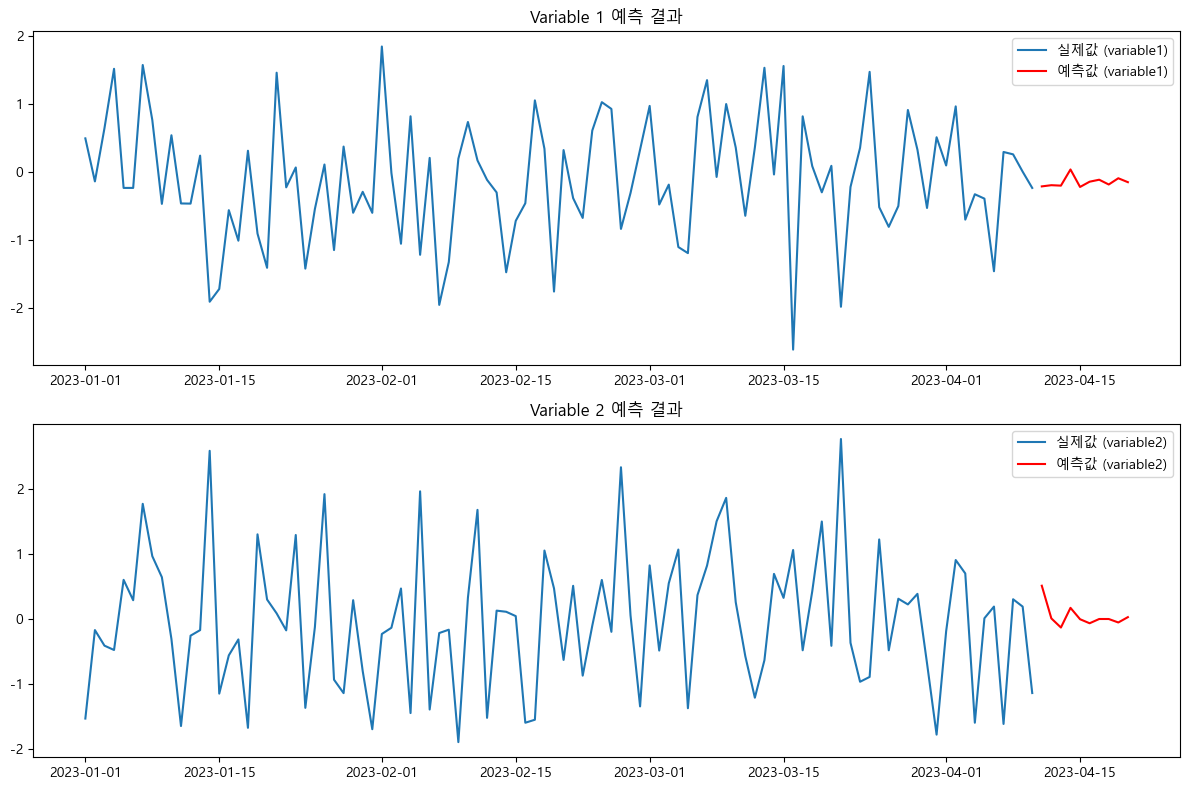

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# 1. 다변량 시계열 데이터 생성 (테스트용)
np.random.seed(42)  # 랜덤 시드 고정 (재현성을 위해)
n = 100  # 데이터 길이
data1 = np.random.normal(0, 1, n)  # 첫 번째 시계열 데이터 (정규분포)
data2 = np.random.normal(0, 1, n) + 0.5 * np.roll(data1, 1)  # 두 번째 시계열 데이터 (첫 번째 데이터와 연관성 부여)

# 2. 데이터프레임으로 변환
date_range = pd.date_range(start='2023-01-01', periods=n, freq='D')
ts_data = pd.DataFrame({'variable1': data1, 'variable2': data2}, index=date_range)

# 3. VAR 모델 학습
model = VAR(ts_data)  # VAR 모델 정의
model_fit = model.fit(maxlags=5)  # 최대 5 시차까지 고려하여 모델 피팅

# 4. 모델 요약 출력
print(model_fit.summary())

# 5. 예측 (향후 10일)
# model_fit.endog을 사용하여 마지막 관측 데이터 제공
lag_order = model_fit.k_ar  # 모델의 시차(lag) 추출
forecast_input = ts_data.values[-lag_order:]  # 마지막 lag_order 길이만큼의 관측 데이터 사용

# 예측 수행
forecast = model_fit.forecast(y=forecast_input, steps=10)
forecast_index = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=ts_data.columns)
print("\n향후 10일 예측값:\n", forecast_df)

# 6. 결과 시각화
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# 변수 1 시각화
axes[0].plot(ts_data['variable1'], label='실제값 (variable1)')
axes[0].plot(forecast_df['variable1'], label='예측값 (variable1)', color='red')
axes[0].set_title('Variable 1 예측 결과')
axes[0].legend()

# 변수 2 시각화
axes[1].plot(ts_data['variable2'], label='실제값 (variable2)')
axes[1].plot(forecast_df['variable2'], label='예측값 (variable2)', color='red')
axes[1].set_title('Variable 2 예측 결과')
axes[1].legend()

plt.tight_layout()
plt.show()